In [1]:
import os
import flexynesis
import torch
import numpy as np
import pandas as pd

Seed set to 42


In [ ]:
# Access the data from the CBioPortal (https://www.cbioportal.org/study/summary?id=msk_impact_2017)
cbio = flexynesis.CBioPortalData('msk_impact_2017')
cbio.get_cbioportal_data(cbio.study_id)

      Available Data Files
              data_cna.txt
               data_sv.txt
data_gene_panel_matrix.txt
  data_clinical_sample.txt
 data_clinical_patient.txt
        data_mutations.txt


Please select a list of files to import. Example:
 get_cbioportal_data('study_id', files={'mut': 'data_mutations.txt', 'clin': 'data_clinical_patient.txt'})


In [3]:
cna = pd.read_csv('./msk_impact_2017/data_cna.txt', delimiter='\t')
mut = pd.read_csv('./msk_impact_2017/data_mutations.txt', delimiter='\t', skiprows=1)
clin = pd.read_csv('./msk_impact_2017/data_clinical_sample.txt', delimiter='\t', skiprows=4)

In [4]:
cna.head()

,Hugo_Symbol,P-0000004-T01-IM3,P-0000015-T01-IM3,P-0000023-T01-IM3,P-0000024-T01-IM3,P-0000025-T02-IM5,P-0000025-T01-IM3,P-0000026-T01-IM3,P-0000027-T01-IM3,P-0000030-T01-IM3,...,P-0012404-T01-IM5,P-0012405-T01-IM5,P-0012406-T01-IM5,P-0012423-T01-IM5,P-0012434-T01-IM5,P-0012442-T01-IM5,P-0012500-T01-IM5,P-0012524-T01-IM5,P-0012557-T01-IM5,P-0012622-T01-IM5
0,ABL1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ACVR1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,AKT1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AKT2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,AKT3,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
mut.head()

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Consequence,Variant_Classification,...,n_alt_count,HGVSc,HGVSp,HGVSp_Short,Transcript_ID,RefSeq,Protein_position,Codons,Hotspot,cDNA_change
0,SPEN,NaN,NaN,GRCh37,1,16265908,16265908,+,missense_variant,Missense_Mutation,...,NaN,ENST00000375759.3:c.10981A>T,p.Ile3661Phe,p.I3661F,ENST00000375759,NM_015001.2,3661.0,Att/Ttt,0,c.10981A>T
1,ALK,NaN,NaN,GRCh37,2,29543736,29543736,+,missense_variant,Missense_Mutation,...,NaN,ENST00000389048.3:c.1427T>C,p.Val476Ala,p.V476A,ENST00000389048,NM_004304.4,476.0,gTg/gCg,0,c.1427T>C
2,PDCD1,NaN,NaN,GRCh37,2,242793433,242793433,+,missense_variant,Missense_Mutation,...,NaN,ENST00000334409.5:c.644C>T,p.Ala215Val,p.A215V,ENST00000334409,NM_005018.2,215.0,gCc/gTc,0,c.644C>T
3,MAP3K1,NaN,NaN,GRCh37,5,56177843,56177843,+,missense_variant,Missense_Mutation,...,NaN,ENST00000399503.3:c.2816C>G,p.Ser939Cys,p.S939C,ENST00000399503,NM_005921.1,939.0,tCt/tGt,0,c.2816C>G
4,FLT4,NaN,NaN,GRCh37,5,180030313,180030313,+,missense_variant,Missense_Mutation,...,NaN,ENST00000261937.6:c.3971G>T,p.Arg1324Leu,p.R1324L,ENST00000261937,NM_182925.4,1324.0,cGg/cTg,0,c.3971G>T


In [6]:
clin.head()

,PATIENT_ID,SAMPLE_ID,SAMPLE_COLLECTION_SOURCE,SPECIMEN_PRESERVATION_TYPE,SPECIMEN_TYPE,DNA_INPUT,SAMPLE_COVERAGE,TUMOR_PURITY,MATCHED_STATUS,SAMPLE_TYPE,PRIMARY_SITE,METASTATIC_SITE,SAMPLE_CLASS,ONCOTREE_CODE,CANCER_TYPE,CANCER_TYPE_DETAILED,SOMATIC_STATUS,TMB_NONSYNONYMOUS
0,P-0000004,P-0000004-T01-IM3,Outside,FFPE,Biopsy,250.0,428,50.0,Matched,Primary,Breast,Not Applicable,Tumor,IDC,Breast Cancer,Breast Invasive Ductal Carcinoma,Matched,17.746485
1,P-0000015,P-0000015-T01-IM3,In-House,FFPE,Biopsy,198.0,281,40.0,Matched,Metastasis,Breast,Liver,Tumor,IDC,Breast Cancer,Breast Invasive Ductal Carcinoma,Matched,7.764087
2,P-0000023,P-0000023-T01-IM3,In-House,FFPE,Biopsy,250.0,454,30.0,Matched,Primary,Peritoneum,Not Applicable,Tumor,PEMESO,Mesothelioma,Peritoneal Mesothelioma,Matched,5.545777
3,P-0000024,P-0000024-T01-IM3,In-House,FFPE,Resection,250.0,1016,40.0,Matched,Metastasis,Uterus,Lung,Tumor,UEC,Endometrial Cancer,Uterine Endometrioid Carcinoma,Matched,6.654932
4,P-0000025,P-0000025-T02-IM5,In-House,FFPE,Biopsy,250.0,1147,30.0,Matched,Metastasis,Uterus,Peritoneum,Tumor,USC,Endometrial Cancer,Uterine Serous Carcinoma/Uterine Papillary Ser...,Matched,1.957439


In [7]:
cbio.get_cbioportal_data(cbio.study_id, files={'mut': 'data_mutations.txt', 'cna': 'data_cna.txt', 'clin': 'data_clinical_sample.txt'})

Importing data_mutations.txt...


Binarizing and converting data_mutations.txt to matrix...
Importing data_cna.txt...
Converting data_cna.txt to matrix...
Importing data_clinical_sample.txt...
{'mut': (414, 10129), 'cna': (410, 10945), 'clin': (10336, 17)}


In [8]:
data = cbio.data
data['clin'].head()

,SAMPLE_ID,SAMPLE_COLLECTION_SOURCE,SPECIMEN_PRESERVATION_TYPE,SPECIMEN_TYPE,DNA_INPUT,SAMPLE_COVERAGE,TUMOR_PURITY,MATCHED_STATUS,SAMPLE_TYPE,PRIMARY_SITE,METASTATIC_SITE,SAMPLE_CLASS,ONCOTREE_CODE,CANCER_TYPE,CANCER_TYPE_DETAILED,SOMATIC_STATUS,TMB_NONSYNONYMOUS
PATIENT_ID,,,,,,,,,,,,,,,,,
P-0000004,P-0000004-T01-IM3,Outside,FFPE,Biopsy,250.0,428.0,50.0,Matched,Primary,Breast,Not Applicable,Tumor,IDC,Breast Cancer,Breast Invasive Ductal Carcinoma,Matched,17.746485
P-0000015,P-0000015-T01-IM3,In-House,FFPE,Biopsy,198.0,281.0,40.0,Matched,Metastasis,Breast,Liver,Tumor,IDC,Breast Cancer,Breast Invasive Ductal Carcinoma,Matched,7.764087
P-0000023,P-0000023-T01-IM3,In-House,FFPE,Biopsy,250.0,454.0,30.0,Matched,Primary,Peritoneum,Not Applicable,Tumor,PEMESO,Mesothelioma,Peritoneal Mesothelioma,Matched,5.545777
P-0000024,P-0000024-T01-IM3,In-House,FFPE,Resection,250.0,1016.0,40.0,Matched,Metastasis,Uterus,Lung,Tumor,UEC,Endometrial Cancer,Uterine Endometrioid Carcinoma,Matched,6.654932
P-0000025,P-0000025-T02-IM5,In-House,FFPE,Biopsy,250.0,1147.0,30.0,Matched,Metastasis,Uterus,Peritoneum,Tumor,USC,Endometrial Cancer,Uterine Serous Carcinoma/Uterine Papillary Ser...,Matched,1.957439


In [9]:
data['mut'].head()

Tumor_Sample_Barcode,P-0000004-T01-IM3,P-0000015-T01-IM3,P-0000023-T01-IM3,P-0000024-T01-IM3,P-0000025-T01-IM3,P-0000025-T02-IM5,P-0000026-T01-IM3,P-0000027-T01-IM3,P-0000030-T01-IM3,P-0000034-T01-IM3,...,P-0012404-T01-IM5,P-0012405-T01-IM5,P-0012406-T01-IM5,P-0012423-T01-IM5,P-0012434-T01-IM5,P-0012442-T01-IM5,P-0012500-T01-IM5,P-0012524-T01-IM5,P-0012557-T01-IM5,P-0012622-T01-IM5
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
ABL1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACVR1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AKT1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AKT2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AKT3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
data['cna'].head()

,P-0000004-T01-IM3,P-0000015-T01-IM3,P-0000023-T01-IM3,P-0000024-T01-IM3,P-0000025-T02-IM5,P-0000025-T01-IM3,P-0000026-T01-IM3,P-0000027-T01-IM3,P-0000030-T01-IM3,P-0000034-T01-IM3,...,P-0012404-T01-IM5,P-0012405-T01-IM5,P-0012406-T01-IM5,P-0012423-T01-IM5,P-0012434-T01-IM5,P-0012442-T01-IM5,P-0012500-T01-IM5,P-0012524-T01-IM5,P-0012557-T01-IM5,P-0012622-T01-IM5
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
ABL1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ACVR1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AKT1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AKT2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AKT3,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Calculate Primary site counts
data['clin'].index = data['clin'].SAMPLE_ID
counts = np.unique(list(data['clin'].PRIMARY_SITE), return_counts=True)
print('Primary site counts:')
for i, j in zip(counts[0], counts[1]):
    print(f'{i}: {j}')
# Get the unique sample IDs
sample_ids = data['clin'].index.unique()

Primary site counts:
 Lung: 1
Abdomen: 19
Abdominal Wall: 3
Adnexa: 1
Adrenal Gland: 78
Ampulla of Vater: 15
Anal: 1
Anorectal Junction: 1
Anus: 36
Appendix: 81
Arm: 4
Ascending Colon: 102
Auditory Canal: 1
Axilla: 2
Back: 3
Bile Duct: 47
Bladder: 323
Blood: 1
Blood Vessel: 5
Bone: 88
Bone Marrow: 1
Bowel: 1
Brain: 582
Breast: 1258
Buttock: 4
Cancer of Unknown Primary: 211
Cecum: 137
Cervix: 49
Cheek: 1
Chest: 1
Chest Wall: 12
Clivus: 1
Colon: 13
Colorectal NOS: 16
Conjunctiva: 4
Descending Colon: 53
Diaphragm: 1
Duodenum: 20
Duodenum-Jejunum: 1
Ear Canal: 1
Ectopic Embryonic Rest: 1
Epidural: 4
Esophagus: 125
Ethmoid Sinus: 3
Eye: 51
Eyelid: 5
Femoral Tendon: 1
Femoral Vein: 1
Fibula: 1
Foot: 8
Forearm: 1
Forehead: 1
GE Junction: 38
Gallbladder: 51
Gastric Wall: 1
Groin: 6
Hard palate: 1
Heart: 7
Hip: 1
Hypopharynx: 3
Ileocecal Valve: 2
Ileum: 11
Intraabdominal: 10
Intrahepatic Bile Duct: 1
Jejunum: 11
Kidney: 330
Knee: 2
Larynx: 20
Leg: 17
Liver: 255
Lower Extremity: 33
Lung: 1673
Ly

In [12]:
cancer_types = counts[0][np.where(counts[1] > 300)]
# Get the cancer types with more than 300 samples
for i, j in zip(cancer_types, counts[1][np.where(counts[1] > 300)]):
    print(f'{i}: {j}')

Bladder: 323
Brain: 582
Breast: 1258
Kidney: 330
Lung: 1673
Pancreas: 497
Prostate: 622
Skin: 326
Uterus: 306


In [13]:
clin_subset = data['clin'][data['clin']['PRIMARY_SITE'].isin(cancer_types)]
data['clin'] = clin_subset
data['clin'].shape
data['clin'].head()

,SAMPLE_ID,SAMPLE_COLLECTION_SOURCE,SPECIMEN_PRESERVATION_TYPE,SPECIMEN_TYPE,DNA_INPUT,SAMPLE_COVERAGE,TUMOR_PURITY,MATCHED_STATUS,SAMPLE_TYPE,PRIMARY_SITE,METASTATIC_SITE,SAMPLE_CLASS,ONCOTREE_CODE,CANCER_TYPE,CANCER_TYPE_DETAILED,SOMATIC_STATUS,TMB_NONSYNONYMOUS
SAMPLE_ID,,,,,,,,,,,,,,,,,
P-0000004-T01-IM3,P-0000004-T01-IM3,Outside,FFPE,Biopsy,250.0,428.0,50.0,Matched,Primary,Breast,Not Applicable,Tumor,IDC,Breast Cancer,Breast Invasive Ductal Carcinoma,Matched,17.746485
P-0000015-T01-IM3,P-0000015-T01-IM3,In-House,FFPE,Biopsy,198.0,281.0,40.0,Matched,Metastasis,Breast,Liver,Tumor,IDC,Breast Cancer,Breast Invasive Ductal Carcinoma,Matched,7.764087
P-0000024-T01-IM3,P-0000024-T01-IM3,In-House,FFPE,Resection,250.0,1016.0,40.0,Matched,Metastasis,Uterus,Lung,Tumor,UEC,Endometrial Cancer,Uterine Endometrioid Carcinoma,Matched,6.654932
P-0000025-T02-IM5,P-0000025-T02-IM5,In-House,FFPE,Biopsy,250.0,1147.0,30.0,Matched,Metastasis,Uterus,Peritoneum,Tumor,USC,Endometrial Cancer,Uterine Serous Carcinoma/Uterine Papillary Ser...,Matched,1.957439
P-0000026-T01-IM3,P-0000026-T01-IM3,In-House,FFPE,Cytology,250.0,1222.0,10.0,Matched,Metastasis,Uterus,Pelvis,Tumor,UEC,Endometrial Cancer,Uterine Endometrioid Carcinoma,Matched,4.436621


In [ ]:
# Data splitting
cbio.data = data
dat_split = cbio.split_data()

In [15]:
{x: dat_split['test'][x].shape for x in dat_split['test'].keys()}

{'mut': (414, 1696), 'cna': (410, 1775), 'clin': (1775, 17)}

In [16]:
{x: dat_split['train'][x].shape for x in dat_split['train'].keys()}

{'mut': (414, 3918), 'cna': (410, 4142), 'clin': (4142, 17)}

In [17]:
cbio.print_dataset(dat_split, 'msk_impact') # Csv files with the data split

In [18]:
import pandas as pd

# Load the clin.csv file into a Pandas DataFrame
clin_df = pd.read_csv('/workspaces/t/msk_impact/train/clin.csv')

# Display the first few rows of the DataFrame
print(clin_df.head())

# Get descriptive statistics for numerical columns
print(clin_df.describe())

# Check unique values for categorical columns
for col in clin_df.columns:
    print(f"Unique values in {col}: {clin_df[col].unique()}")

           SAMPLE_ID        SAMPLE_ID.1 SAMPLE_COLLECTION_SOURCE  \
0  P-0000004-T01-IM3  P-0000004-T01-IM3                  Outside   
1  P-0000030-T01-IM3  P-0000030-T01-IM3                  Outside   
2  P-0000034-T01-IM3  P-0000034-T01-IM3                 In-House   
3  P-0000036-T01-IM3  P-0000036-T01-IM3                 In-House   
4  P-0000055-T01-IM3  P-0000055-T01-IM3                 In-House   

  SPECIMEN_PRESERVATION_TYPE SPECIMEN_TYPE  DNA_INPUT  SAMPLE_COVERAGE  \
0                       FFPE        Biopsy      250.0            428.0   
1                       FFPE        Biopsy      250.0            757.0   
2                       FFPE     Resection      250.0            461.0   
3                       FFPE        Biopsy       50.0            380.0   
4                       FFPE     Resection      250.0            910.0   

   TUMOR_PURITY MATCHED_STATUS SAMPLE_TYPE PRIMARY_SITE METASTATIC_SITE  \
0          50.0        Matched     Primary       Breast  Not Applicable

In [ ]:
HPO_ITER = 25 # Number of iterations for Hyperparameter optimization

In [ ]:
# Import the data and prepare training and test datasets
data_importer = flexynesis.DataImporter(path ='msk_impact/', 
                                       data_types = ['mut', 'cna'], 
                                        concatenate=False, top_percentile=90, variance_threshold=0.1,
                                        min_features=500)
train_dataset, test_dataset = data_importer.import_data()


[INFO] ================= Importing Data =================
[INFO] Validating data folders...

[INFO] ----------------- Reading Data ----------------- 
[INFO] Importing msk_impact/train/mut.csv...
[INFO] Importing msk_impact/train/cna.csv...
[INFO] Importing msk_impact/train/clin.csv...

[INFO] ----------------- Reading Data ----------------- 
[INFO] Importing msk_impact/test/mut.csv...
[INFO] Importing msk_impact/test/cna.csv...
[INFO] Importing msk_impact/test/clin.csv...

[INFO] ----------------- Checking for problems with the input data ----------------- 

[WARNING] Warnings:

[WARNING] 1. Warning: Some sample labels in train/clin.csv are missing in train/mut.csv: {'P-0010389-T01-IM5', 'P-0009796-T02-IM5', 'P-0003294-T01-IM5', 'P-0008289-T01-IM5', 'P-0007098-T01-IM5', 'P-0000401-T01-IM3', 'P-0001713-T01-IM3', 'P-0000689-T01-IM3', 'P-0005438-T01-IM5', 'P-0011475-T01-IM5', 'P-0007106-T01-IM5', 'P-0006299-T01-IM5', 'P-0001060-T01-IM3', 'P-0003605-T01-IM5', 'P-0005052-T01-IM5', 'P-00076

In [21]:
train_dataset.dat

{'mut': tensor([[-0.1134, -0.0495, -0.1430,  ..., -0.0968, -0.1896, -0.0542],
         [-0.1134, -0.0495, -0.1430,  ..., -0.0968, -0.1896, -0.0542],
         [-0.1134, -0.0495, -0.1430,  ..., -0.0968, -0.1896, -0.0542],
         ...,
         [-0.1134, -0.0495, -0.1430,  ..., -0.0968, -0.1896, -0.0542],
         [-0.1134, -0.0495, -0.1430,  ..., -0.0968, -0.1896, -0.0542],
         [-0.1134, -0.0495, -0.1430,  ..., -0.0968, -0.1896, -0.0542]]),
 'cna': tensor([[-0.0830, -0.1352, -0.0897,  ..., -0.0888,  0.0711, -0.0369],
         [-0.0830, -0.1352, -0.0897,  ..., -0.0888,  0.0711, -0.0369],
         [-0.0830, -0.1352, -0.0897,  ...,  7.8181,  0.0711, -0.0369],
         ...,
         [-0.0830, -0.1352, -0.0897,  ..., -0.0888,  0.0711, -0.0369],
         [-0.0830, -0.1352, -0.0897,  ..., -0.0888,  0.0711, -0.0369],
         [-0.0830, -0.1352, -0.0897,  ..., -0.0888,  0.0711, -0.0369]])}

In [22]:
train_dataset.dat['cna'].shape, train_dataset.dat['mut'].shape

(torch.Size([2047, 338]), torch.Size([2047, 361]))

In [23]:
train_dataset.ann

{'DNA_INPUT': tensor([130.9000, 225.0000, 250.0000,  ..., 250.0000, 250.0000, 250.0000],
        dtype=torch.float64),
 'SAMPLE_COVERAGE': tensor([ 625.,  379.,  444.,  ..., 1514.,  922.,  984.], dtype=torch.float64),
 'TUMOR_PURITY': tensor([60., 30., 70.,  ..., 60., 80., 20.], dtype=torch.float64),
 'TMB_NONSYNONYMOUS': tensor([ 4.4366,  2.2183,  2.9362,  ..., 47.6937,  1.9574, 14.6808],
        dtype=torch.float64),
 'SAMPLE_ID.1': tensor([  18.,  137.,  717.,  ...,  314., 1977., 1324.], dtype=torch.float64),
 'SAMPLE_COLLECTION_SOURCE': tensor([0., 1., 0.,  ..., 1., 0., 0.], dtype=torch.float64),
 'SPECIMEN_PRESERVATION_TYPE': tensor([2., 2., 2.,  ..., 2., 2., 2.], dtype=torch.float64),
 'SPECIMEN_TYPE': tensor([0., 0., 2.,  ..., 2., 0., 0.], dtype=torch.float64),
 'MATCHED_STATUS': tensor([0., 0., 0.,  ..., 0., 0., 0.], dtype=torch.float64),
 'SAMPLE_TYPE': tensor([0., 1., 0.,  ..., 0., 1., 1.], dtype=torch.float64),
 'PRIMARY_SITE': tensor([2., 4., 8.,  ..., 7., 1., 0.], dtype=to

In [24]:
train_dataset.label_mappings

{'SAMPLE_ID.1': {0: 'P-0000004-T01-IM3',
  1: 'P-0000030-T01-IM3',
  2: 'P-0000034-T01-IM3',
  3: 'P-0000056-T01-IM3',
  4: 'P-0000058-T01-IM3',
  5: 'P-0000063-T01-IM3',
  6: 'P-0000064-T02-IM3',
  7: 'P-0000066-T01-IM3',
  8: 'P-0000068-T01-IM3',
  9: 'P-0000071-T01-IM3',
  10: 'P-0000075-T01-IM3',
  11: 'P-0000077-T01-IM3',
  12: 'P-0000079-T01-IM3',
  13: 'P-0000080-T01-IM3',
  14: 'P-0000084-T01-IM3',
  15: 'P-0000092-T01-IM3',
  16: 'P-0000093-T01-IM3',
  17: 'P-0000104-T01-IM3',
  18: 'P-0000106-T01-IM3',
  19: 'P-0000110-T01-IM3',
  20: 'P-0000113-T01-IM3',
  21: 'P-0000120-T01-IM3',
  22: 'P-0000122-T01-IM3',
  23: 'P-0000126-T01-IM3',
  24: 'P-0000129-T01-IM3',
  25: 'P-0000130-T01-IM3',
  26: 'P-0000131-T01-IM3',
  27: 'P-0000132-T01-IM3',
  28: 'P-0000140-T01-IM3',
  29: 'P-0000142-T01-IM3',
  30: 'P-0000149-T01-IM3',
  31: 'P-0000156-T01-IM3',
  32: 'P-0000158-T01-IM3',
  33: 'P-0000163-T02-IM3',
  34: 'P-0000165-T01-IM3',
  35: 'P-0000167-T02-IM3',
  36: 'P-0000183-T01-IM

In [25]:
train_dataset.samples[1:25], train_dataset.features

(['P-0000706-T01-IM3',
  'P-0003754-T01-IM5',
  'P-0003624-T01-IM5',
  'P-0004550-T01-IM5',
  'P-0007062-T01-IM5',
  'P-0006479-T01-IM5',
  'P-0003424-T01-IM5',
  'P-0010566-T01-IM5',
  'P-0004213-T01-IM5',
  'P-0011241-T01-IM5',
  'P-0010659-T01-IM5',
  'P-0008406-T01-IM5',
  'P-0003819-T01-IM5',
  'P-0000317-T01-IM3',
  'P-0011081-T01-IM5',
  'P-0003139-T02-IM5',
  'P-0009148-T01-IM5',
  'P-0000985-T01-IM3',
  'P-0000944-T01-IM3',
  'P-0002151-T01-IM3',
  'P-0006653-T01-IM5',
  'P-0007705-T01-IM5',
  'P-0009543-T01-IM5',
  'P-0002272-T01-IM3'],
 {'mut': Index(['ABL1', 'ACVR1', 'AKT1', 'AKT2', 'AKT3', 'ALK', 'ALOX12B', 'AMER1',
         'ANKRD11', 'APC',
         ...
         'VEGFA', 'VHL', 'VTCN1', 'WT1', 'XIAP', 'XPO1', 'YAP1', 'YES1', 'ZFHX3',
         'ZRSR2'],
        dtype='object', name='Hugo_Symbol', length=361),
  'cna': Index(['AKT1', 'AKT2', 'AKT3', 'ALOX12B', 'AMER1', 'ANKRD11', 'APC', 'AR',
         'ARAF', 'ARID1A',
         ...
         'VEGFA', 'VHL', 'VTCN1', 'WT1', 

In [26]:
flexynesis.print_summary_stats(train_dataset)

Summary for variable: DNA_INPUT
Numerical Variable Summary: Median = 250.0, Mean = 235.27487835857352
------
Summary for variable: SAMPLE_COVERAGE
Numerical Variable Summary: Median = 735.0, Mean = 731.0004885197851
------
Summary for variable: TUMOR_PURITY
Numerical Variable Summary: Median = 50.0, Mean = 50.638646847770374
------
Summary for variable: TMB_NONSYNONYMOUS
Numerical Variable Summary: Median = 4.436621202, Mean = 7.507028410360039
------
Summary for variable: SAMPLE_ID.1
Categorical Variable Summary:
  Label: P-0000004-T01-IM3, Count: 1
  Label: P-0000030-T01-IM3, Count: 1
  Label: P-0000034-T01-IM3, Count: 1
  Label: P-0000056-T01-IM3, Count: 1
  Label: P-0000058-T01-IM3, Count: 1
  Label: P-0000063-T01-IM3, Count: 1
  Label: P-0000064-T02-IM3, Count: 1
  Label: P-0000066-T01-IM3, Count: 1
  Label: P-0000068-T01-IM3, Count: 1
  Label: P-0000071-T01-IM3, Count: 1
  Label: P-0000075-T01-IM3, Count: 1
  Label: P-0000077-T01-IM3, Count: 1
  Label: P-0000079-T01-IM3, Count: 1

In [ ]:
tuner = flexynesis.HyperparameterTuning(dataset = train_dataset, 
                                        model_class = flexynesis.supervised_vae, 
                                        target_variables = [],
                                        config_name = "supervised_vae", # supervised_vae and no target variable for UNSUPERVISED training
                                        plot_losses=True, early_stop_patience=10, 
                                        n_iter=HPO_ITER)   
# https://github.com/BIMSBbioinfo/compgen_course_2025_module3/blob/main/other_tutorials/unsupervised_analysis_single_cell.ipynb

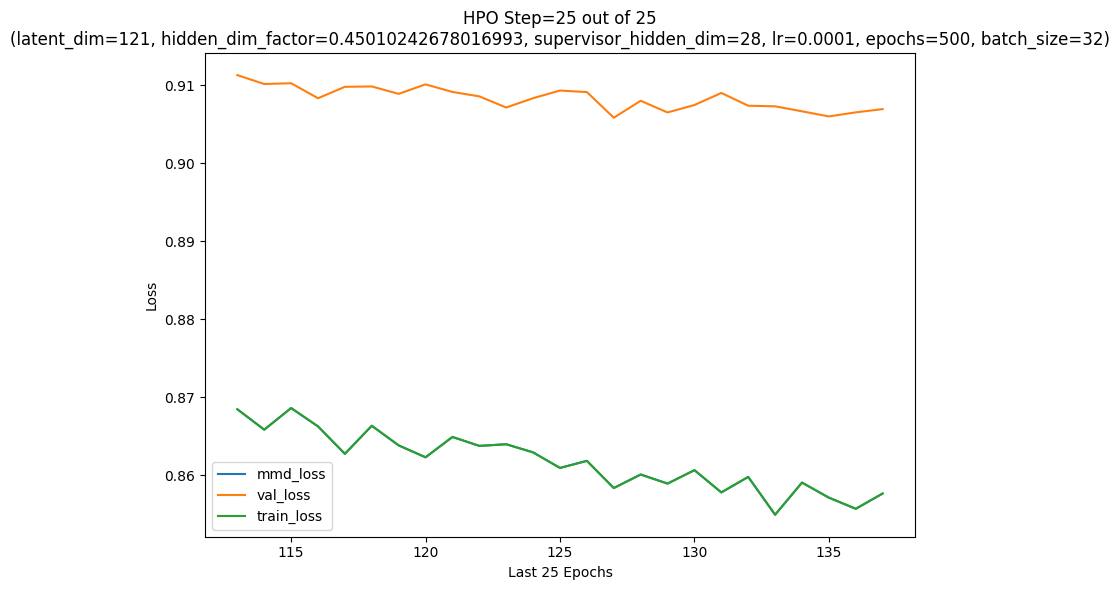

Validation: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         mmd_loss          │    0.9065770506858826     │
│         val_loss          │    0.9065770506858826     │
└───────────────────────────┴───────────────────────────┘

Tuning Progress: 100%|██████████| 25/25 [1:36:12<00:00, 230.88s/it, Iteration=25, Best Loss=0.806]

[INFO] current best val loss: 0.8064464926719666; best params: {'latent_dim': np.int64(125), 'hidden_dim_factor': 0.3368797851533919, 'supervisor_hidden_dim': np.int64(31), 'lr': 0.0001, 'epochs': np.int64(500), 'batch_size': np.int64(32)} since 4 hpo iterations


In [28]:
model, best_params = tuner.perform_tuning()

In [29]:
ds = test_dataset 
E = model.transform(ds) # Generate embeddings for test dataset

In [59]:
# Clustering of the embeddings
cluster_labels, G, partition = flexynesis.louvain_clustering(E, k = 15) # Try different values of k to get different clustering solutions

In [60]:
# K-means clustering
kmeans_cluster_labels, optimal_k, silhouette_scores = flexynesis.get_optimal_clusters(E, min_k=10, max_k=20) 

Performing PCA...
Performing UMAP...


/home/codespace/miniconda3/envs/flexenv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
/home/codespace/miniconda3/envs/flexenv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.


Performing t-SNE...
Generating plots...


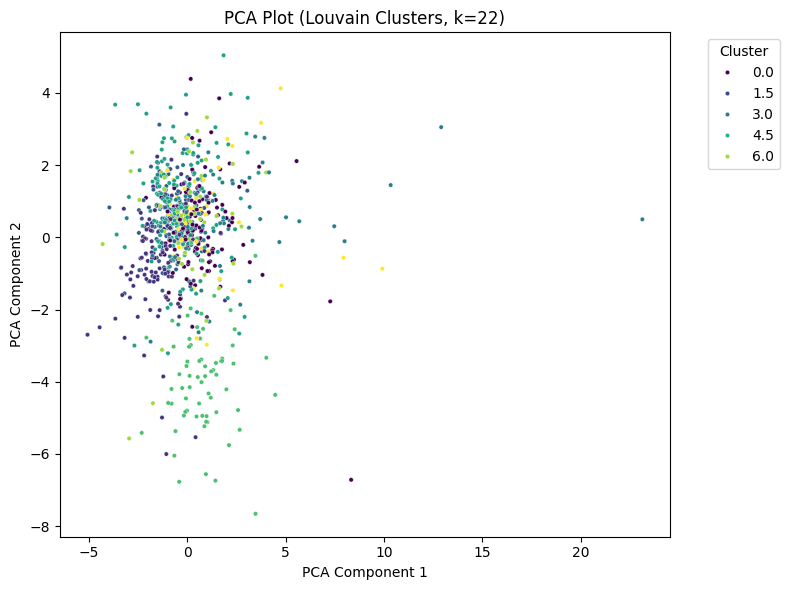

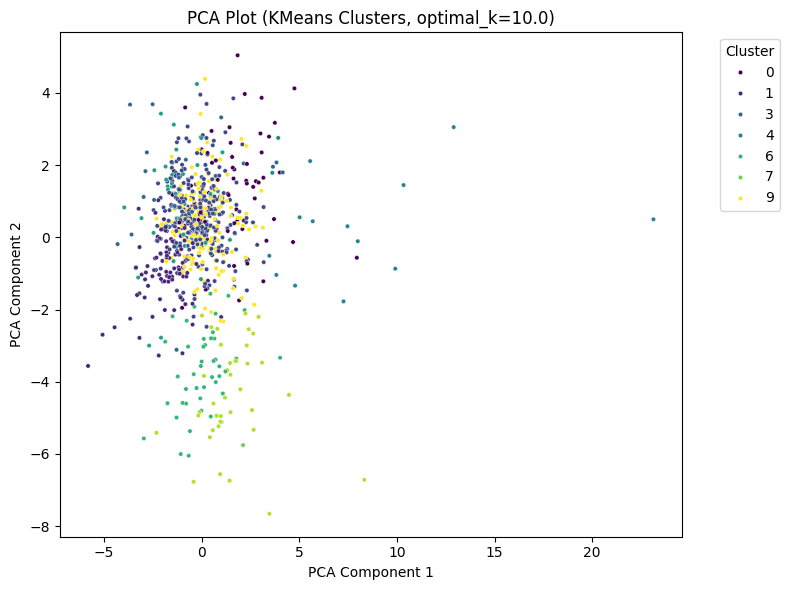

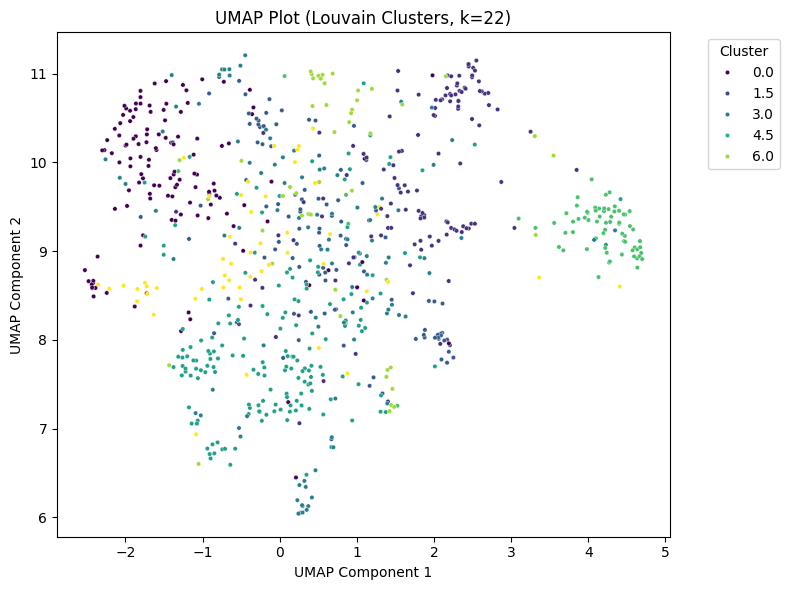

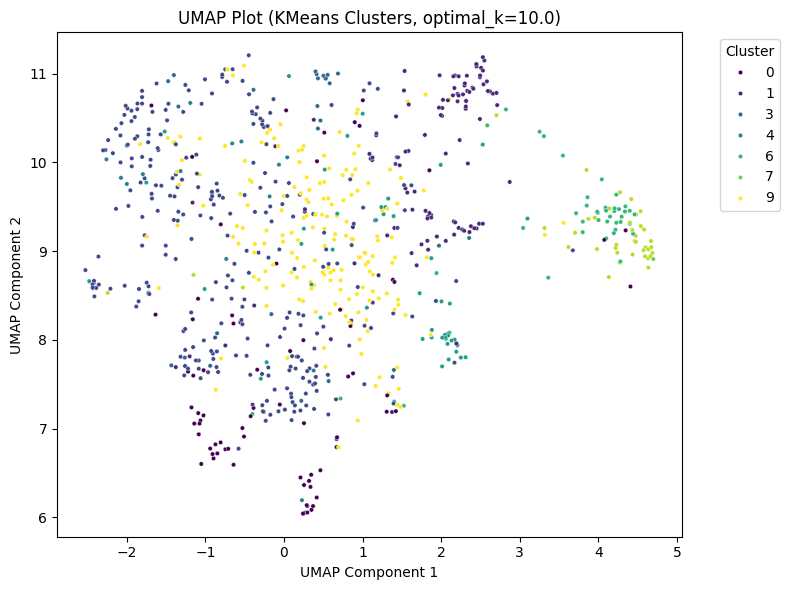

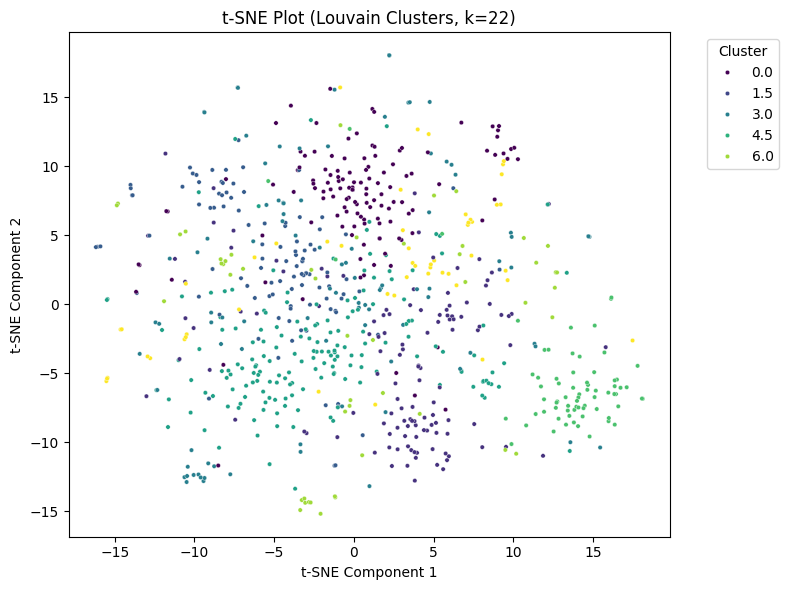

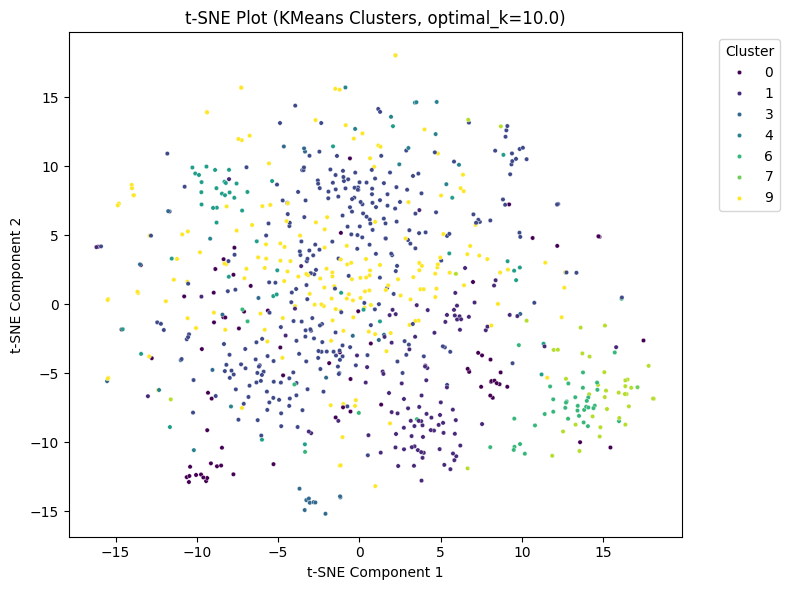

In [ ]:
# Dimensionality reduction and comparative visualization - MANUAL Way
import matplotlib.pyplot as plt
import seaborn as sns
import umap
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Perform Dimensionality Reduction 
print("Performing PCA...")
pca = PCA(n_components=2)
E_pca = pca.fit_transform(E)

print("Performing UMAP...")
reducer = umap.UMAP(n_components=2, random_state=42)
E_umap = reducer.fit_transform(E)

print("Performing t-SNE...")
tsne = TSNE(n_components=2, random_state=42)
E_tsne = tsne.fit_transform(E)

# Plotting 
print("Generating plots...")
# 1a. PCA Plot (Louvain)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=E_pca[:, 0], y=E_pca[:, 1], hue=cluster_labels, palette='viridis', s=10) # Added s for smaller points
plt.title(f"PCA Plot (Louvain Clusters, k={len(set(cluster_labels))})") # Added k info
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 1b. PCA Plot (KMeans) - Added for completeness
plt.figure(figsize=(8, 6))
sns.scatterplot(x=E_pca[:, 0], y=E_pca[:, 1], hue=kmeans_cluster_labels, palette='viridis', s=10)
plt.title(f"PCA Plot (KMeans Clusters, optimal_k={optimal_k})") # Use optimal_k from cell 31
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2a. UMAP Plot (Louvain)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=E_umap[:, 0], y=E_umap[:, 1], hue=cluster_labels, palette='viridis', s=10)
plt.title(f"UMAP Plot (Louvain Clusters, k={len(set(cluster_labels))})")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2b. UMAP Plot (KMeans)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=E_umap[:, 0], y=E_umap[:, 1], hue=kmeans_cluster_labels, palette='viridis', s=10)
plt.title(f"UMAP Plot (KMeans Clusters, optimal_k={optimal_k})")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3a. t-SNE Plot (Louvain)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=E_tsne[:, 0], y=E_tsne[:, 1], hue=cluster_labels, palette='viridis', s=10)
plt.title(f"t-SNE Plot (Louvain Clusters, k={len(set(cluster_labels))})")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3b. t-SNE Plot (KMeans)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=E_tsne[:, 0], y=E_tsne[:, 1], hue=kmeans_cluster_labels, palette='viridis', s=10)
plt.title(f"t-SNE Plot (KMeans Clusters, optimal_k={optimal_k})")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The UMAP plots are generally the most suitable because they tend to provide a better balance between preserving global data structure and highlighting local cluster relationships.

**Louvain vs. K-Means for Multi-omics Clustering**

| Feature          | K-Means                       | Louvain                        |
| :--------------- | :---------------------------- | :----------------------------- |
| **Input**        | Feature vectors               | Similarity graph/network       |
| **Needs # Clusters?** | Yes (`K`)                     | No                             |
| **Cluster Shape**  | Assumes spherical             | Flexible (connectivity-based)  |
| **Mechanism**    | Distance to mean (centroid)   | Network modularity             |
| **Multi-omics Use** | Direct (needs scaling/feature engineering) | Often follows graph integration (e.g., SNF) |

**In essence:**

*   **K-Means:** Simple, needs `K`, best for well-behaved vector data. Challenging to apply directly to diverse multi-omics data.
*   **Louvain:** More complex, finds `K`, good for network data. Often preferred *after* integrating multi-omics data into a sample similarity network.

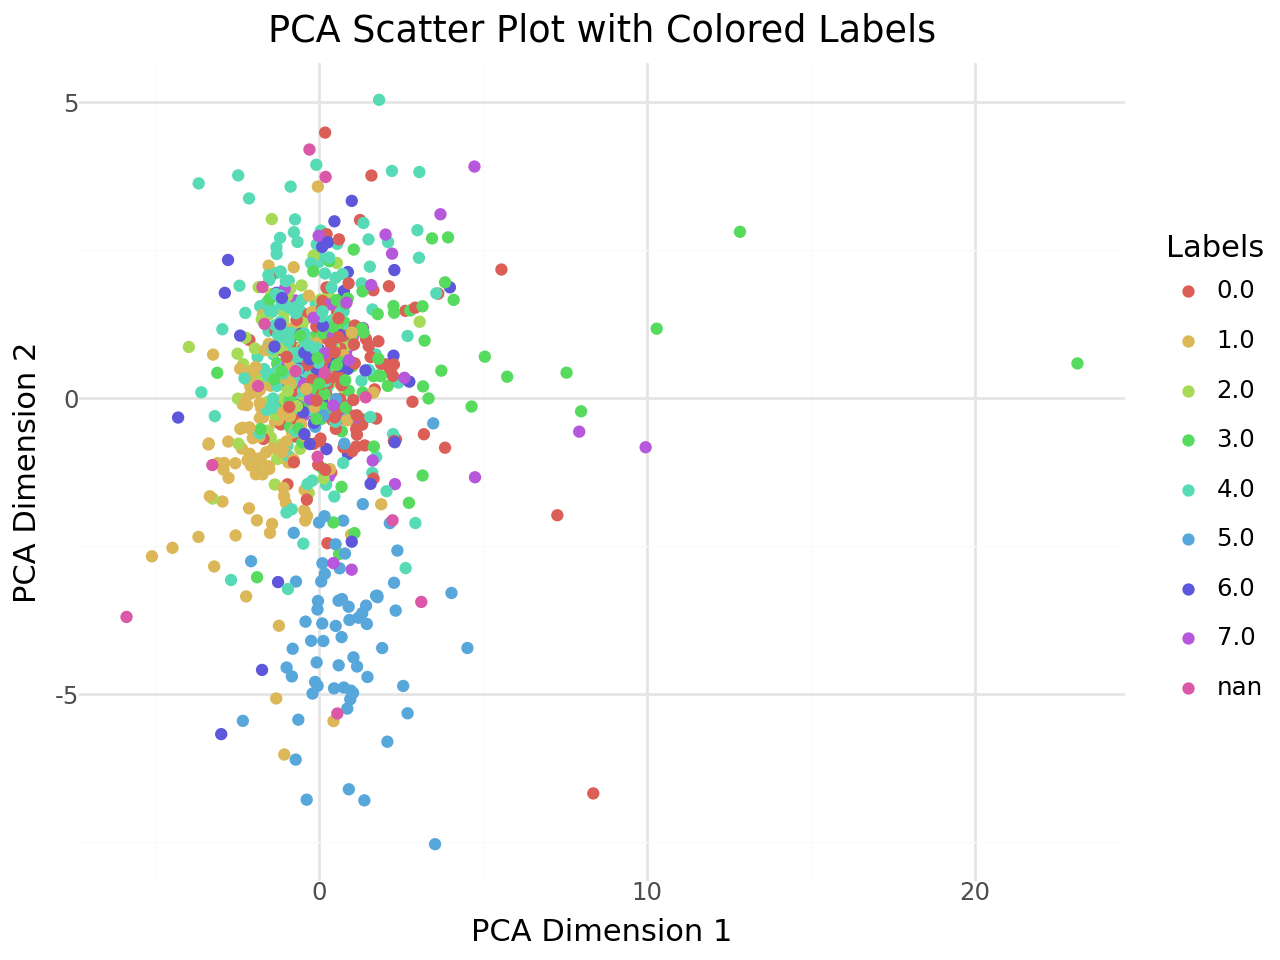

In [ ]:
# In Flexynesis way
# Visualize clusters using PCA - shows separation along axes of maximum linear variance
flexynesis.plot_dim_reduced(E, cluster_labels, color_type = 'categorical', method='pca')

/home/codespace/miniconda3/envs/flexenv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.


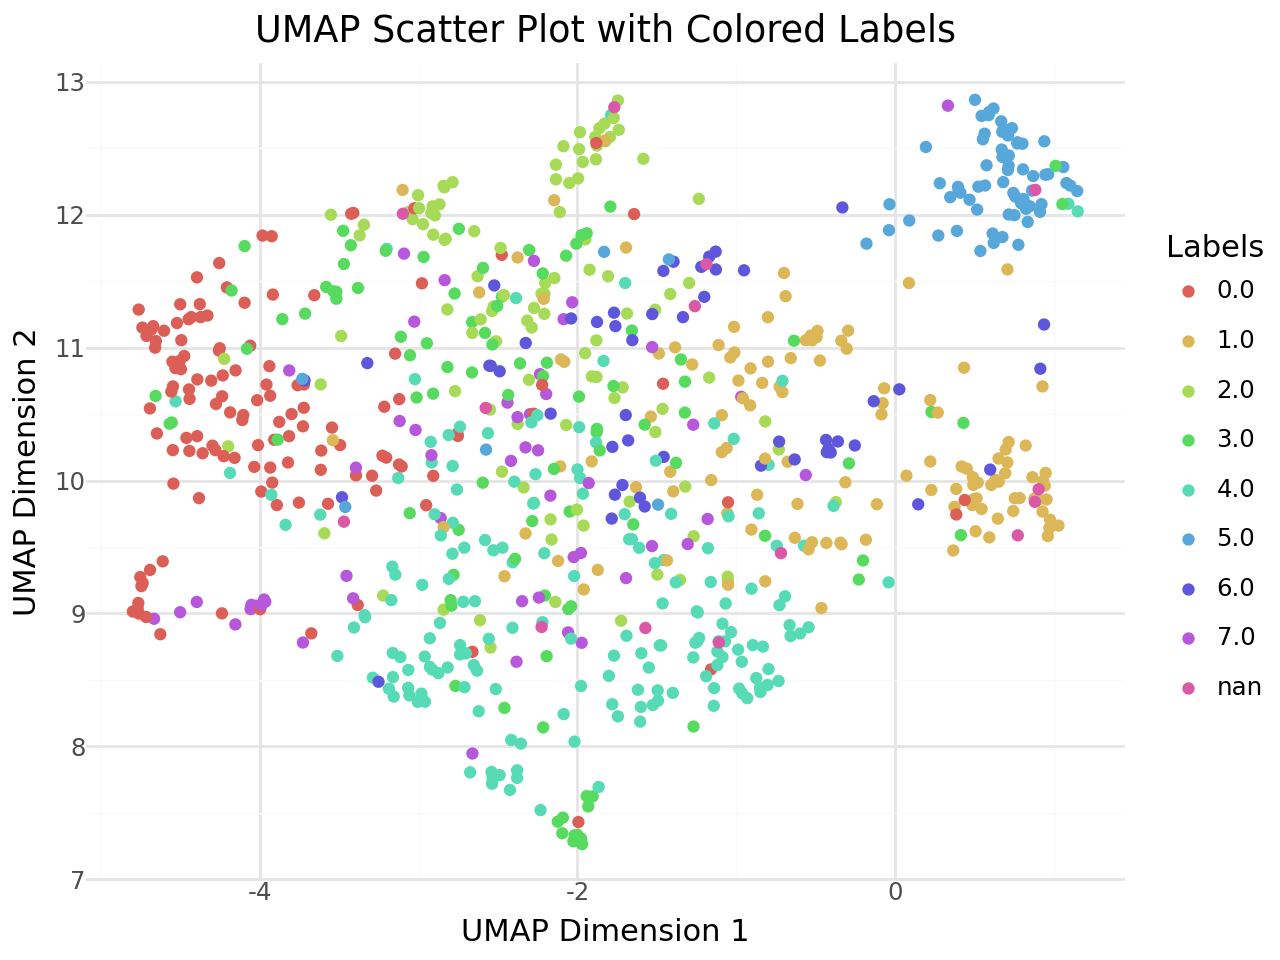

In [ ]:
# Visualize clusters using UMAP - often better at showing non-linear separation
flexynesis.plot_dim_reduced(E, cluster_labels, color_type = 'categorical', method='umap')

The **UMAP plot** generally provides a clearer visualization of these clusters. It does a better job of separating the different colored groups in the 2D space compared to the PCA plot, where the clusters appear more mixed. This often happens with complex biological data because UMAP is better at capturing non-linear relationships between samples.

In [33]:
# Load the test clinical data
test_clin_df = pd.read_csv('msk_impact/test/clin.csv', index_col='SAMPLE_ID') # Or use test_dataset.ann if easier to access

# Create a mapping from sample ID to cluster label
cluster_map = dict(zip(test_dataset.samples, cluster_labels))

# Add the cluster label to the clinical dataframe
test_clin_df['louvain_cluster'] = test_clin_df.index.map(cluster_map)

print("Samples per Louvain cluster:")
print(test_clin_df['louvain_cluster'].value_counts().sort_index())

Samples per Louvain cluster:
louvain_cluster
0.0    147
1.0    152
2.0     97
3.0     72
4.0     20
5.0    169
6.0     46
7.0     35
8.0     52
9.0     13
Name: count, dtype: int64



Primary Site Distribution by Louvain Cluster:
PRIMARY_SITE     Bladder  Brain  Breast  Kidney  Lung  Pancreas  Prostate  \
louvain_cluster                                                             
0.0                   18     58      12       2    33         5         6   
1.0                    5      4      71       3    33         3         9   
2.0                    1      3      22       0    32        12        14   
3.0                    9      0      47       0     6         1         1   
4.0                    1      2       4       0     9         2         0   
5.0                    7      9      41       2    66        16        17   
6.0                    2      0       9       1    19         4         4   
7.0                    4      0       3       0     7         1        17   
8.0                    2     16      10       1    12         2         4   
9.0                    0      3       1       1     5         0         3   

PRIMARY_SITE     Skin  Uteru

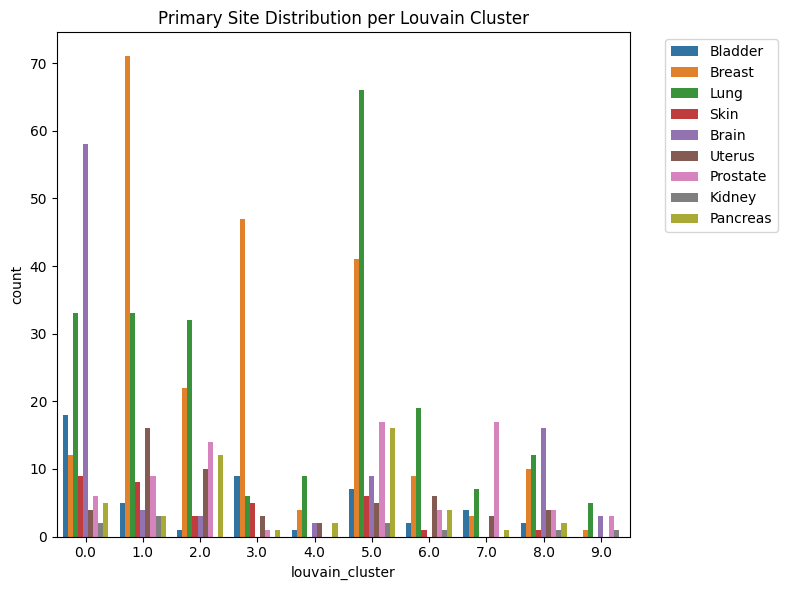

In [66]:
import scipy.stats as stats

print("\nPrimary Site Distribution by Louvain Cluster:")
contingency_table_site = pd.crosstab(test_clin_df['louvain_cluster'], test_clin_df['PRIMARY_SITE'])
print(contingency_table_site)

chi2, p, dof, ex = stats.chi2_contingency(contingency_table_site)
print(f"Chi2 test for Primary Site: p-value = {p}") # Check assumptions

sns.countplot(data=test_clin_df, x='louvain_cluster', hue='PRIMARY_SITE')
plt.title('Primary Site Distribution per Louvain Cluster')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


TMB Distribution by Louvain Cluster:


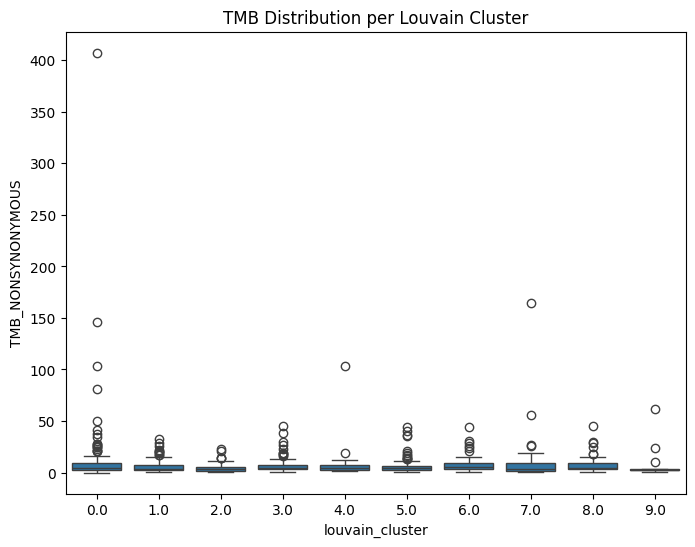

In [35]:
print("\nTMB Distribution by Louvain Cluster:")
sns.boxplot(data=test_clin_df, x='louvain_cluster', y='TMB_NONSYNONYMOUS')
plt.title('TMB Distribution per Louvain Cluster')
plt.show()

**TMB (Tumor Mutational Burder) represents the number of mutations per megabase of sequenced DNA,** and higher TMB can sometimes be associated with certain cancer types (like melanoma, lung) or specific molecular features (like mismatch repair deficiency) and potential response to immunotherapy.

The plot shows that while the typical non-synonymous TMB is low across all identified Louvain clusters, there's considerable heterogeneity driven by high-TMB outliers. Cluster 0 stands out for containing the sample with the highest TMB. This suggests TMB is largely independent of the primary clustering features for most samples but might be relevant for specific outlier cases within certain clusters.

In [ ]:
# Perform Kruskal-Wallis (non-parametric) and ANOVA (parametric) tests
from scipy.stats import kruskal, f_oneway
import numpy as np

# Create a list of TMB values for each cluster
cluster_groups_tmb = [group['TMB_NONSYNONYMOUS'].dropna().values 
                     for name, group in test_clin_df.groupby('louvain_cluster')]

# Perform Kruskal-Wallis test 
stat_kw, p_kw = kruskal(*cluster_groups_tmb)
print(f"Kruskal-Wallis test for TMB: p-value = {p_kw:.3e}")

# Perform one-way ANOVA 
try:
    stat_anova, p_anova = f_oneway(*cluster_groups_tmb)
    print(f"One-way ANOVA test for TMB: p-value = {p_anova:.3e}")
    
    # Print interpretation
    alpha = 0.05
    print("\nInterpretation:")
    print(f"{'Both' if p_kw < alpha and p_anova < alpha else 'Neither' if p_kw >= alpha and p_anova >= alpha else 'Only one'} "
          f"test{'s show' if p_kw < alpha and p_anova < alpha else 's shows' if p_kw < alpha or p_anova < alpha else ' shows'} "
          f"significant differences between clusters (α = {alpha})")
    
    if p_kw < alpha and p_anova >= alpha:
        print("Note: Discrepancy between tests suggests non-normal distribution; prefer Kruskal-Wallis results.")
        
except ValueError as e:
    print(f"\nError performing ANOVA: {e}")

Kruskal-Wallis test for TMB: p-value = 1.385e-02
One-way ANOVA test for TMB: p-value = 5.460e-02

Interpretation:
Only one tests shows significant differences between clusters (α = 0.05)
Note: Discrepancy between tests suggests non-normal distribution; prefer Kruskal-Wallis results.


The discrepancy between the tests arises because TMB data often exhibits a skewed distribution with outliers, violating the normality and equal variance assumptions required by ANOVA. The Kruskal-Wallis test does not rely on these assumptions and is more robust for such data.

Therefore, we rely on the **Kruskal-Wallis result**, concluding that there is a **statistically significant difference** in the TMB distribution across the Louvain clusters.

**In summary, this significant difference suggests that the underlying biological characteristics used to create these Louvain clusters are also linked, to some extent, to the tumor's mutational load (TMB). Cluster membership provides some information about a sample's likely TMB distribution.**

Primary Site Distribution by Louvain Cluster (Contingency Table):
PRIMARY_SITE     Bladder  Brain  Breast  Kidney  Lung  Pancreas  Prostate  \
louvain_cluster                                                             
0.0                   18     58      12       2    33         5         6   
1.0                    5      4      71       3    33         3         9   
2.0                    1      3      22       0    32        12        14   
3.0                    9      0      47       0     6         1         1   
4.0                    1      2       4       0     9         2         0   
5.0                    7      9      41       2    66        16        17   
6.0                    2      0       9       1    19         4         4   
7.0                    4      0       3       0     7         1        17   
8.0                    2     16      10       1    12         2         4   
9.0                    0      3       1       1     5         0         3   

PRIMARY_S

<Figure size 1500x1000 with 0 Axes>

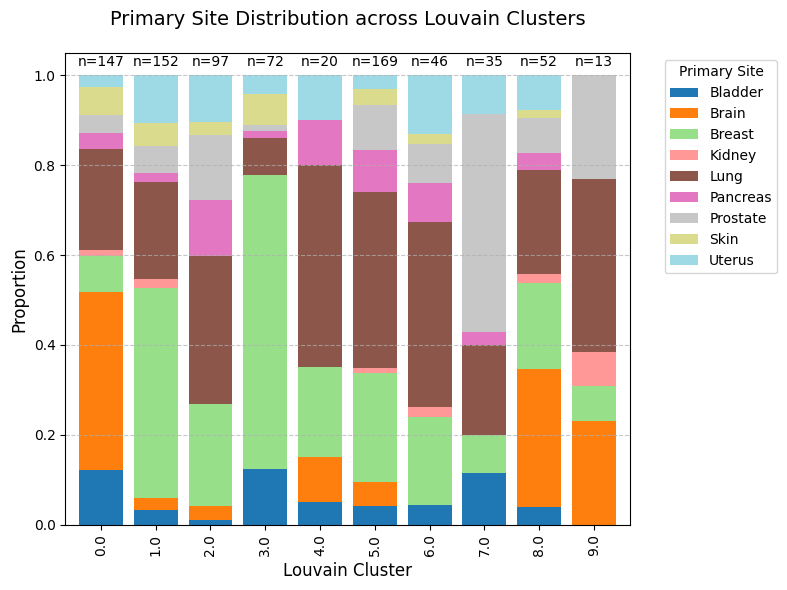


Statistical Interpretation:
- There is a significant association between Louvain clusters and Primary Sites (p < 0.05)

Strongest cluster-site associations:
Cluster 0.0: Brain (enriched, z=9.74)
Cluster 1.0: Breast (enriched, z=4.55)
Cluster 2.0: Pancreas (enriched, z=2.73)
Cluster 3.0: Breast (enriched, z=6.14)
Cluster 5.0: Lung (enriched, z=2.82)
Cluster 6.0: Brain (depleted, z=-2.33)
Cluster 7.0: Prostate (enriched, z=7.59)
Cluster 8.0: Brain (enriched, z=3.97)
Cluster 9.0: Kidney (enriched, z=2.08)

Cluster Sizes:
Cluster 0.0: 147 samples
Cluster 1.0: 152 samples
Cluster 2.0: 97 samples
Cluster 3.0: 72 samples
Cluster 4.0: 20 samples
Cluster 5.0: 169 samples
Cluster 6.0: 46 samples
Cluster 7.0: 35 samples
Cluster 8.0: 52 samples
Cluster 9.0: 13 samples


In [74]:
# Statistical Analysis of Primary Site Distribution by Louvain Cluster
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Create contingency table and run chi-square test
print("Primary Site Distribution by Louvain Cluster (Contingency Table):")
contingency_table_site = pd.crosstab(test_clin_df['louvain_cluster'], test_clin_df['PRIMARY_SITE'])
print(contingency_table_site)

# Perform Chi-squared test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table_site)
print(f"\nChi-squared Test Results:")
print(f"Chi2 statistic: {chi2:.2f}")
print(f"P-value: {p:.3e}")
print(f"Degrees of freedom: {dof}")

# Check test assumptions and print warnings if needed
cells_under_5 = (expected < 5).sum().sum()
if cells_under_5 > 0:
    print(f"\nWarning: {cells_under_5} cells have expected frequencies < 5")
    print("Chi-square test results may be unreliable")

# Calculate proportions for each cluster
cluster_proportions = contingency_table_site.div(contingency_table_site.sum(axis=1), axis=0)

# Create visualization
plt.figure(figsize=(15, 10))

# Create stacked bar plot showing proportions
ax = cluster_proportions.plot(kind='bar', stacked=True, 
                            colormap='tab20',
                            width=0.8)

# Customize plot
plt.title('Primary Site Distribution across Louvain Clusters', fontsize=14, pad=20)
plt.xlabel('Louvain Cluster', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.legend(title='Primary Site', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add cluster sizes
for i, cluster in enumerate(contingency_table_site.index):
    total = contingency_table_site.loc[cluster].sum()
    plt.text(i, 1.02, f'n={total}', ha='center')

# Adjust layout
plt.tight_layout()
plt.show()

# Print statistical interpretation
print("\nStatistical Interpretation:")
if p < 0.05:
    print("- There is a significant association between Louvain clusters and Primary Sites (p < 0.05)")
    
    # Calculate and display the strongest associations
    # Using standardized residuals
    residuals = stats.chi2_contingency(contingency_table_site)[3]
    std_residuals = (contingency_table_site - residuals) / np.sqrt(residuals)
    
    # Find strongest associations
    print("\nStrongest cluster-site associations:")
    for cluster in std_residuals.index:
        max_residual = std_residuals.loc[cluster].abs().max()
        site = std_residuals.loc[cluster].abs().idxmax()
        if max_residual > 2:  # Common threshold for significance
            direction = "enriched" if std_residuals.loc[cluster, site] > 0 else "depleted"
            print(f"Cluster {cluster}: {site} ({direction}, z={std_residuals.loc[cluster, site]:.2f})")
else:
    print("- No significant association between Louvain clusters and Primary Sites (p ≥ 0.05)")

# Display sample size information
print("\nCluster Sizes:")
cluster_sizes = test_clin_df['louvain_cluster'].value_counts().sort_index()
for cluster, size in cluster_sizes.items():
    print(f"Cluster {cluster}: {size} samples")

**Analysis: Primary Site Distribution vs. Louvain Clusters**

This analysis examines how different primary tumor sites (e.g., Lung, Brain, Breast) are distributed across the Louvain clusters derived from molecular data.

**Findings:**

1.  **Visualization:** The stacked bar chart clearly shows that the proportion of primary sites varies significantly between Louvain clusters. Certain clusters appear enriched for specific cancer types (e.g., Cluster 3 for Breast, Cluster 7 for Prostate).
2.  **Statistical Test:** A Chi-squared test was performed to formally assess this association.
    *   **Result:** The test yielded a highly significant p-value (`P-value: 8.469e-52`).
    *   **Conclusion:** This strongly rejects the null hypothesis that primary sites are distributed randomly across clusters. There is a statistically significant association between Louvain cluster membership and the primary site of the tumor.
3.  **Post-Hoc:** Analysis of residuals confirmed specific enrichments/depletions (e.g., Brain in Cluster 0, Breast in Cluster 3, Prostate in Cluster 7 were significantly over-represented compared to chance).
4.  **Test Caveat:** A warning noted that some expected counts were low, which can affect Chi-squared accuracy. However, the extremely low p-value indicates the overall association is undeniably strong and real.

**Interpretation:**
The Louvain clustering, based on underlying molecular features, is effectively separating samples according to their tissue of origin. This indicates that the molecular profiles captured by the clustering are strongly related to the fundamental biological differences between cancers arising from different primary sites.

**A Note on Step 3 (Post-Hoc / Residuals):**

The main Chi-squared test (Step 2) tells us *that* there's an overall significant association between Louvain clusters and Primary Sites, but not *where* this association lies.

Step 3 uses **Standardized Residuals** (reported as "z=" values) to pinpoint the specific contributions:

*   **Purpose:** To identify which specific combinations of `Cluster` and `Primary Site` occur significantly more often ("enriched", positive z-value) or less often ("depleted", negative z-value) than expected purely by chance.
*   **How:** It compares the *actual observed count* in each cell of the table (e.g., Brain tumors in Cluster 0) to the count *expected if there were no association*. This difference is then standardized (scaled) to see how many standard deviations away it is from the expected value.
*   **Interpretation:** A standardized residual with an absolute value greater than ~2 (i.e., z > 2 or z < -2) is typically considered a statistically significant deviation, highlighting the specific cluster-site pairings driving the overall result.


Cancer Type Detailed Distribution by Louvain Cluster:


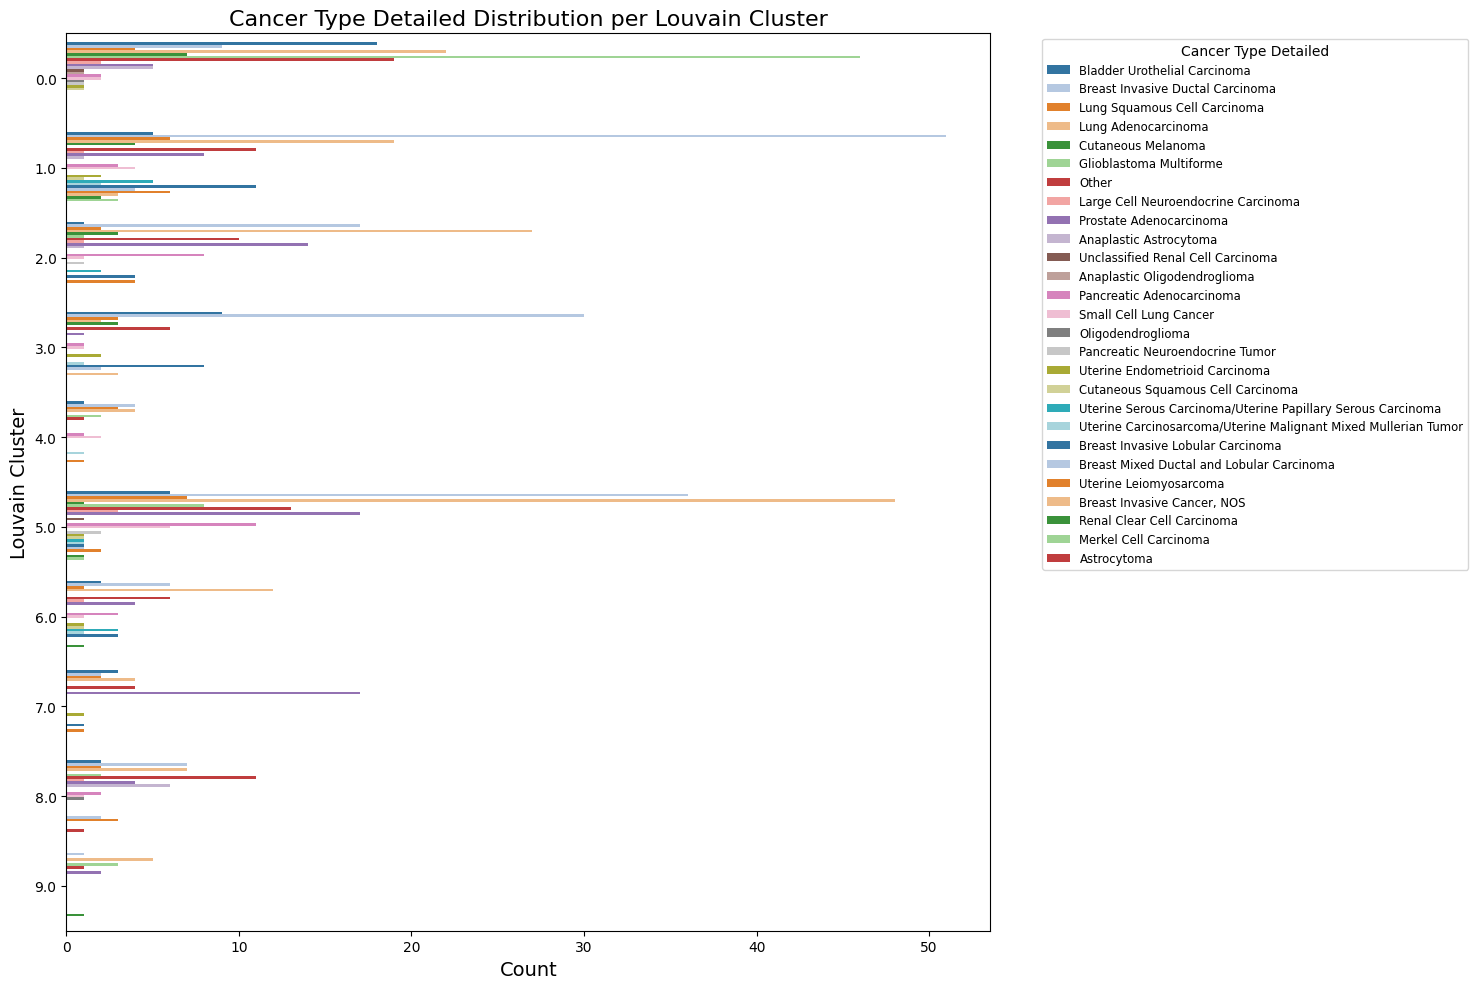

In [54]:
print("\nCancer Type Detailed Distribution by Louvain Cluster:")

# Group less frequent categories into "Other" for better readability
threshold = 10  # Minimum count to keep a category
test_clin_df['CANCER_TYPE_DETAILED_GROUPED'] = test_clin_df['CANCER_TYPE_DETAILED'].apply(
    lambda x: x if test_clin_df['CANCER_TYPE_DETAILED'].value_counts()[x] >= threshold else 'Other'
)

# Increase figure size and use a horizontal bar plot
plt.figure(figsize=(15, 10))
sns.countplot(
    data=test_clin_df,
    y='louvain_cluster',
    hue='CANCER_TYPE_DETAILED_GROUPED',
    orient='h',
    palette='tab20'
)

# Adjust title, labels, and legend
plt.title('Cancer Type Detailed Distribution per Louvain Cluster', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Louvain Cluster', fontsize=14)
plt.legend(
    title='Cancer Type Detailed',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize='small'
)
plt.tight_layout()
plt.show()

**Analysis: Detailed Cancer Subtype Distribution vs. Louvain Clusters**

This chart provides a more granular view than the previous "Primary Site" analysis, showing the distribution of specific cancer subtypes (histologies) across the Louvain clusters.

**Key Findings:**

1.  **Subtype Specificity:** The Louvain clusters often show strong enrichment for particular cancer subtypes. For example:
    *   Cluster 0 is dominated by specific brain tumors (Glioblastoma, Astrocytoma).
    *   Clusters 1 & 3 show high counts of Breast Invasive Ductal Carcinoma.
    *   Cluster 7 is mainly Prostate Adenocarcinoma.
2.  **Refined Understanding:** This confirms and details the previous finding that clusters associate with tissue of origin. It reveals that the molecular clustering is sensitive enough to distinguish between different histological subtypes within the same organ.

**Interpretation:**
The molecular features used to create the Louvain clusters are strongly linked to the specific biological characteristics that define these detailed cancer subtypes. This suggests the clusters represent distinct biological states relevant to specific cancer histologies, enhancing their potential biological and clinical meaning.


Sample Type (Primary/Metastasis) Distribution by Louvain Cluster:


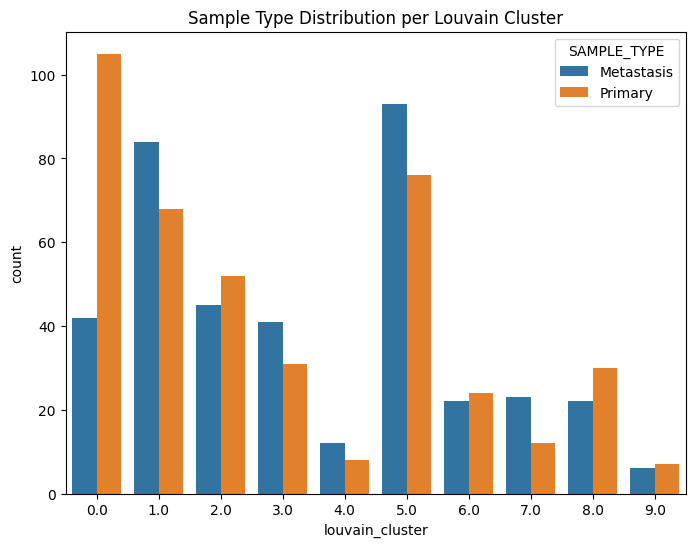

SAMPLE_TYPE      Metastasis  Primary
louvain_cluster                     
0.0                      42      105
1.0                      84       68
2.0                      45       52
3.0                      41       31
4.0                      12        8
5.0                      93       76
6.0                      22       24
7.0                      23       12
8.0                      22       30
9.0                       6        7

Chi-squared test for Sample Type: p-value = 2.315e-05


In [39]:
# Sample Type Distribution by Louvain Cluster
print("\nSample Type (Primary/Metastasis) Distribution by Louvain Cluster:")
sns.countplot(data=test_clin_df, x='louvain_cluster', hue='SAMPLE_TYPE')
plt.title('Sample Type Distribution per Louvain Cluster')
plt.show()

contingency_table_sampletype = pd.crosstab(test_clin_df['louvain_cluster'], test_clin_df['SAMPLE_TYPE'])
print(contingency_table_sampletype)
try:
    chi2_st, p_st, dof_st, ex_st = stats.chi2_contingency(contingency_table_sampletype)
    print(f"\nChi-squared test for Sample Type: p-value = {p_st:.3e}")
    if (ex_st < 5).sum().sum() > 0: print("Warning: Low expected frequencies.")
except ValueError:
    print("\nCould not perform Chi-squared test for Sample Type.")

**Analysis: Sample Type (Primary vs. Metastasis) Distribution vs. Louvain Clusters**

This analysis investigates whether primary and metastatic samples are distributed differently across the molecularly-defined Louvain clusters.

**Findings:**

1.  **Visualization:** The grouped bar chart shows noticeable variation in the ratio of primary to metastatic samples across different clusters. Some clusters (e.g., 0, 8) are enriched in primary samples, while others (e.g., 1, 3, 5, 7) tend to have higher counts of metastatic samples.
2.  **Statistical Test:** A Chi-squared test was used to assess the association between `louvain_cluster` and `SAMPLE_TYPE`.
    *   **Result:** The test yielded a highly significant p-value (`p = 2.315e-05`).
    *   **Conclusion:** This indicates a strong, statistically significant association between cluster membership and whether a sample is primary or metastatic.

**Interpretation:**
The molecular characteristics driving the Louvain clustering are significantly related to the tumor's status as primary or metastatic. The clusters capture biological differences linked not only to cancer subtype/origin but also, to some extent, to the stage of tumor progression represented by the sample type.


Tumor Purity Distribution by Louvain Cluster:


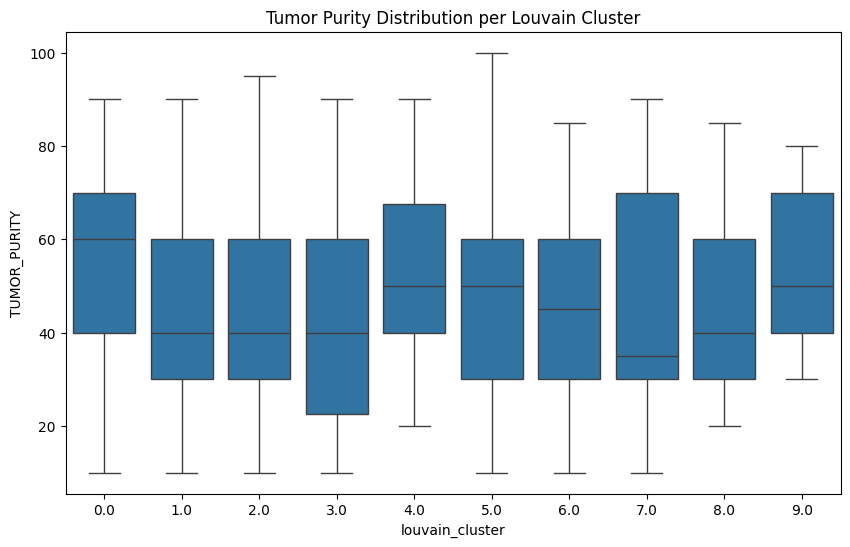


Kruskal-Wallis test for Tumor Purity: p-value = 3.667e-05


In [40]:
# Tumor Purity Distribution by Louvain Cluster
print("\nTumor Purity Distribution by Louvain Cluster:")
plt.figure(figsize=(10, 6))
sns.boxplot(data=test_clin_df, x='louvain_cluster', y='TUMOR_PURITY')
plt.title('Tumor Purity Distribution per Louvain Cluster')
plt.show()

# Perform Kruskal-Wallis test (non-parametric)
try:
   cluster_groups_purity = [group['TUMOR_PURITY'].dropna().values for name, group in test_clin_df.groupby('louvain_cluster') if not group['TUMOR_PURITY'].dropna().empty]
   if len(cluster_groups_purity) > 1: # Need at least 2 groups
       stat_purity, p_purity = kruskal(*cluster_groups_purity)
       print(f"\nKruskal-Wallis test for Tumor Purity: p-value = {p_purity:.3e}")
   else:
       print("\nNot enough groups with purity data for Kruskal-Wallis test.")
except ValueError as e:
    print(f"\nCould not perform Kruskal-Wallis test for Purity: {e}")

**Analysis: Tumor Purity Distribution vs. Louvain Clusters**

This analysis examines the distribution of estimated Tumor Purity across the different Louvain clusters. Tumor purity reflects the proportion of cancer cells in a given sample.

**Findings:**

1.  **Visualization:** The box plot shows visible differences in the median tumor purity and its spread across the Louvain clusters. Some clusters (e.g., 0, 4, 7, 9) exhibit generally higher purity, while others (e.g., 2, 3, 6, 8) show lower purity.
2.  **Statistical Test:** A Kruskal-Wallis test was used to compare tumor purity distributions across clusters.
    *   **Result:** The test yielded a highly significant p-value (`p = 3.667e-05`).
    *   **Conclusion:** There is a statistically significant difference in tumor purity distributions among the Louvain clusters.

**Interpretation:**
The molecular characteristics that define the Louvain clusters are significantly associated with the tumor purity of the samples. This implies a link between the molecular profiles used for clustering and the cellular composition of the tumor microenvironment within each cluster. Clusters may differ in features like immune infiltration or stromal reaction, which influences both purity estimates and the molecular data.